<a href="https://colab.research.google.com/github/ravi0613/cad/blob/main/cad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
import os
path = os.listdir("/content/training_dataset")
classes = {'no_tumor':0, 'pituitary_tumor':1, 'glioma_tumor':2, 'meningioma_tumor':3}


In [13]:
import cv2
X = []
Y = []
for cls in classes:
    pth = "/content/training_dataset/"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        if img is None or img.shape[:2] == (0, 0):
          continue

        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])



In [14]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [15]:
np.unique(Y)

array([0, 1, 2, 3])

In [16]:
pd.Series(Y).value_counts()

1    827
2    826
3    822
0    395
Name: count, dtype: int64

In [18]:
X.shape, X_updated.shape

((2870, 200, 200), (2870, 40000))

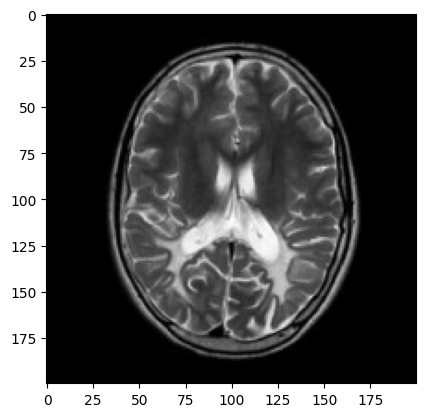

In [19]:
plt.imshow(X[0], cmap='gray')

In [20]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [22]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [23]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [24]:
from sklearn.decomposition import PCA

In [25]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [27]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [28]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [29]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.7996515679442509


In [30]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9425087108013938
Testing Score: 0.8118466898954704


In [31]:
pred = sv.predict(xtest)

In [32]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 32,  36,  40,  41,  43,  46,  47,  50,  59,  60,  65,  77,  82,
         90, 107, 108, 113, 121, 125, 140, 141, 143, 145, 151, 157, 161,
        162, 163, 164, 165, 169, 177, 182, 183, 185, 189, 194, 199, 202,
        207, 210, 212, 215, 227, 228, 232, 240, 253, 255, 271, 276, 305,
        306, 314, 315, 323, 329, 330, 334, 343, 348, 352, 354, 355, 356,
        359, 363, 370, 373, 379, 380, 390, 392, 393, 402, 404, 409, 410,
        412, 413, 419, 425, 433, 434, 435, 441, 446, 449, 451, 452, 455,
        465, 468, 477, 478, 493, 503, 510, 517, 522, 524, 535, 542, 543,
        546, 558, 561, 563]),)

In [33]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  108
2 3


In [34]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

In [56]:
print(p[0])


2


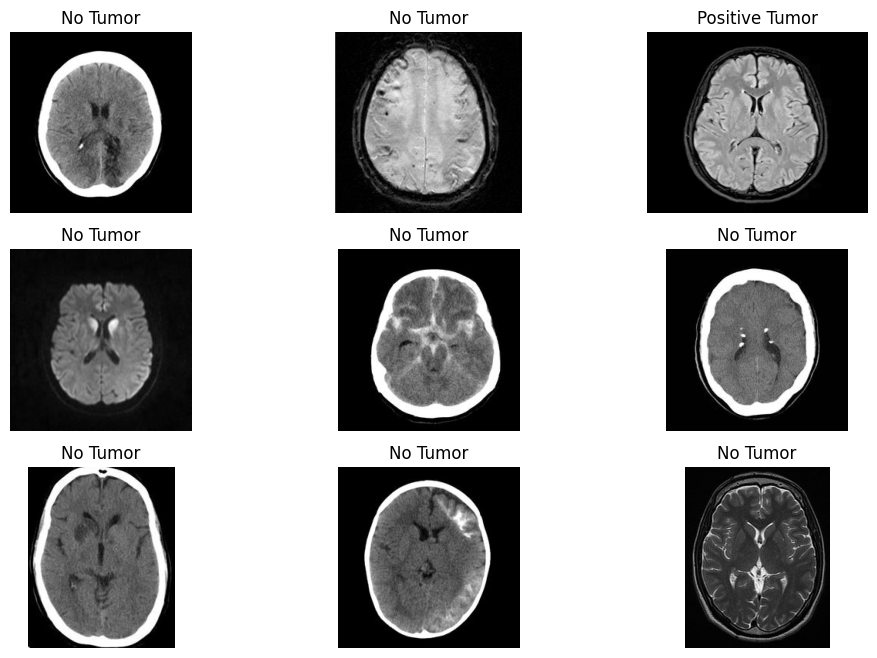

In [58]:
plt.figure(figsize=(12,8))
p = os.listdir("/content/test_dataset/")
c=1
for i in os.listdir("/content/test_dataset/no_tumor/")[0:9]:
    plt.subplot(3,3,c)
    img = cv2.imread("/content/test_dataset/no_tumor/"+i,0)
    if img is None or img.shape[:2] == (0, 0):
          continue


    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)

# Check the predicted value
    predicted_value = p[0]

    # Display image with predicted label
    if predicted_value in dec:
        plt.title(dec[predicted_value])
    else:
      plt.title("Positive Tumor")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir("/content/test_dataset/")
c=1
for i in os.listdir("/content/test_dataset/no_tumor/")[0:9]:
    plt.subplot(3,3,c)
    img = cv2.imread("/content/test_dataset/no_tumor/"+i,0)
    if img is None or img.shape[:2] == (0, 0):
          continue


    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)

# Check the predicted value
    predicted_value = p[0]

    # Display image with predicted label
    if predicted_value in dec:
        plt.title(dec[predicted_value])
    else:
      plt.title("Positive Tumor")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


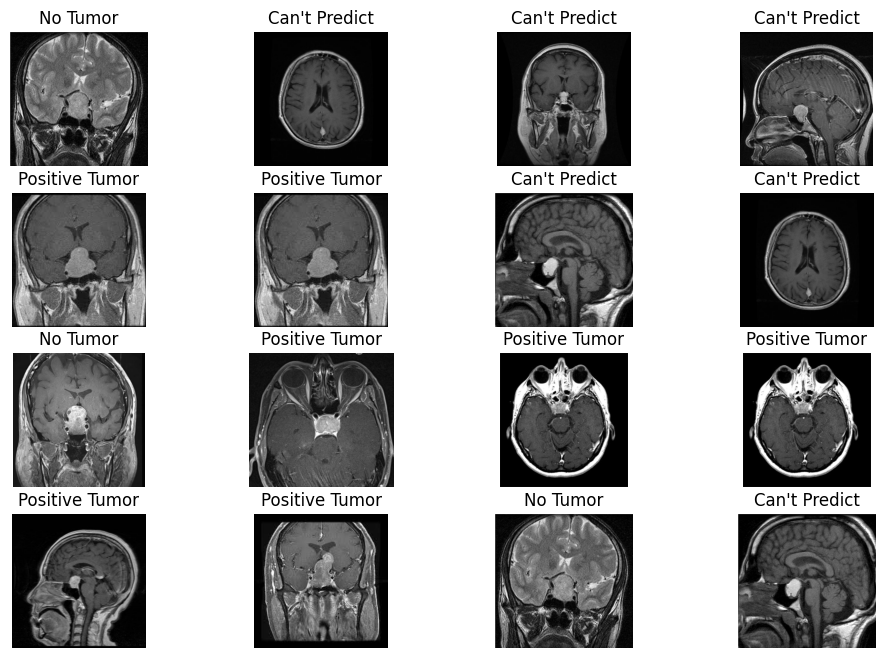

In [59]:
plt.figure(figsize=(12,8))
p = os.listdir("/content/test_dataset/")
c=1
for i in os.listdir('/content/test_dataset/pituitary_tumor/')[:]:
    if c>16:
        break
    plt.subplot(4,4,c)
    img = cv2.imread('/content/test_dataset/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    if p[0] in dec:
        plt.title(dec[p[0]])
    else:
        plt.title("Can't Predict" )
    #plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


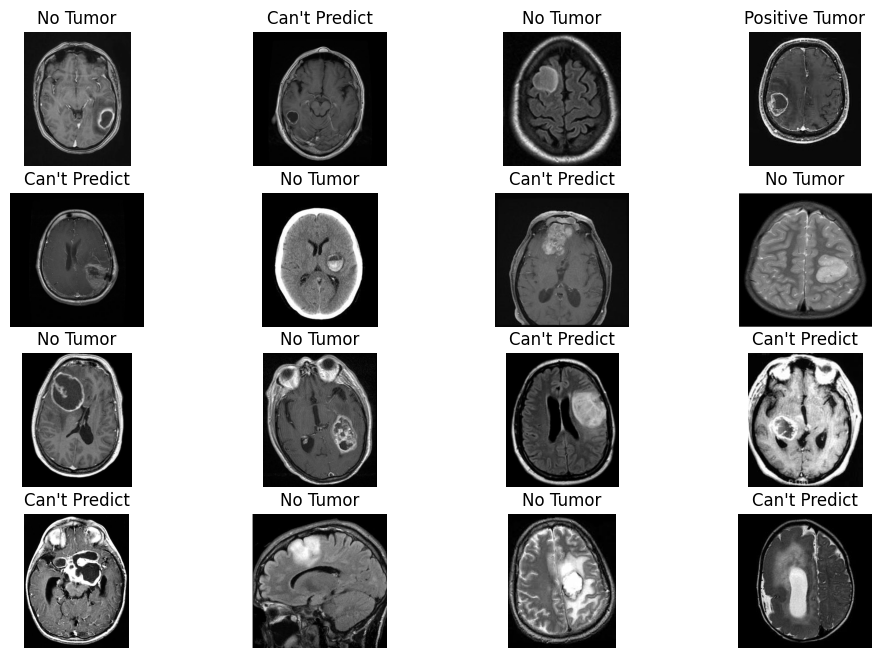

In [61]:
plt.figure(figsize=(12,8))
p = os.listdir("/content/test_dataset/")
c=1
for i in os.listdir('/content/test_dataset/glioma_tumor/')[:]:
    if c>16:
        break
    plt.subplot(4,4,c)
    img = cv2.imread('/content/test_dataset/glioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    if p[0] in dec:
        plt.title(dec[p[0]])
    else:
        plt.title("Can't Predict")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


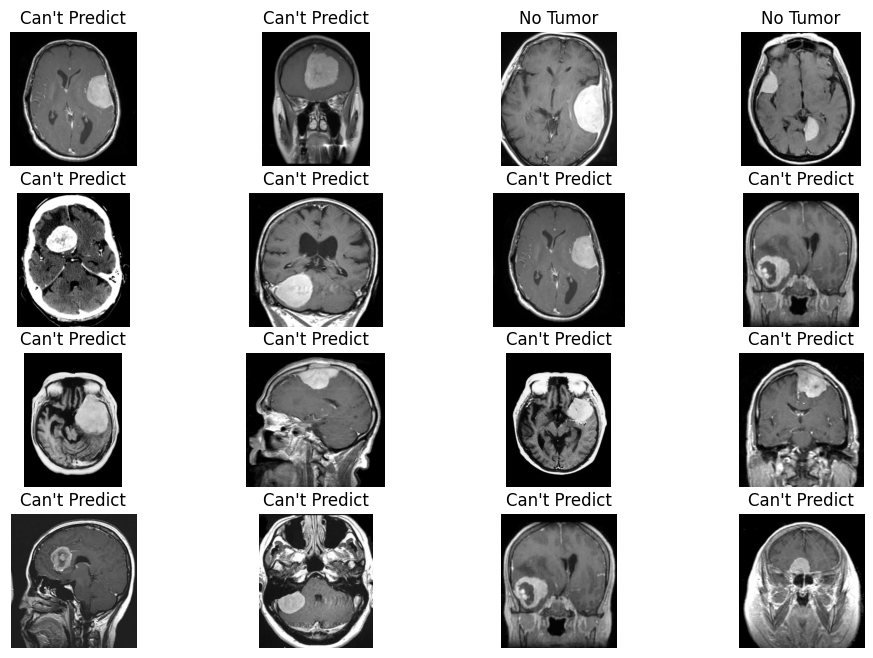

In [64]:
plt.figure(figsize=(12,8))
p = os.listdir("/content/test_dataset/")
c=1
for i in os.listdir('/content/test_dataset/meningioma_tumor/')[20:]:
    if c>16:
        break
    plt.subplot(4,4,c)
    img = cv2.imread('/content/test_dataset/meningioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    if p[0] in dec:
        plt.title(dec[p[0]])
    else:
        plt.title("Can't Predict")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
